# SVD for Sensor Data Compression

This notebook demonstrates how Singular Value Decomposition (SVD) can be used for dimensionality reduction and noise filtering in a synthetic sensor dataset.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set(style="whitegrid")


## Step 1: Generate Synthetic Sensor Data
We simulate a sensor dataset with 500 sensor channels and 6600 time steps. The data will contain both structured signals and added noise.

I.e. Here channels refers to the number of samples/measurements

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Define dimensions
n_channels = 500
n_timesteps = 6600
n_signals = 12  # number of latent signal sources

# Generate low-rank signal matrix
time = np.linspace(0, 20 * np.pi, n_timesteps)
sources = np.array([np.sin(time * f / 10) for f in range(1, n_signals + 1)])  # shape: (12, 6600)
weights = np.random.randn(n_channels, n_signals)  # shape: (500, 12)
signal_matrix = weights @ sources  # shape: (500, 6600)

# Add Gaussian noise
noise = 0.5 * np.random.randn(n_channels, n_timesteps)
data_matrix = signal_matrix + noise

print("Data matrix shape:", data_matrix.shape)


Data matrix shape: (500, 6600)


### Visualize Raw Sensor Data
We visualize a few sensor channels to understand the structure and noise.

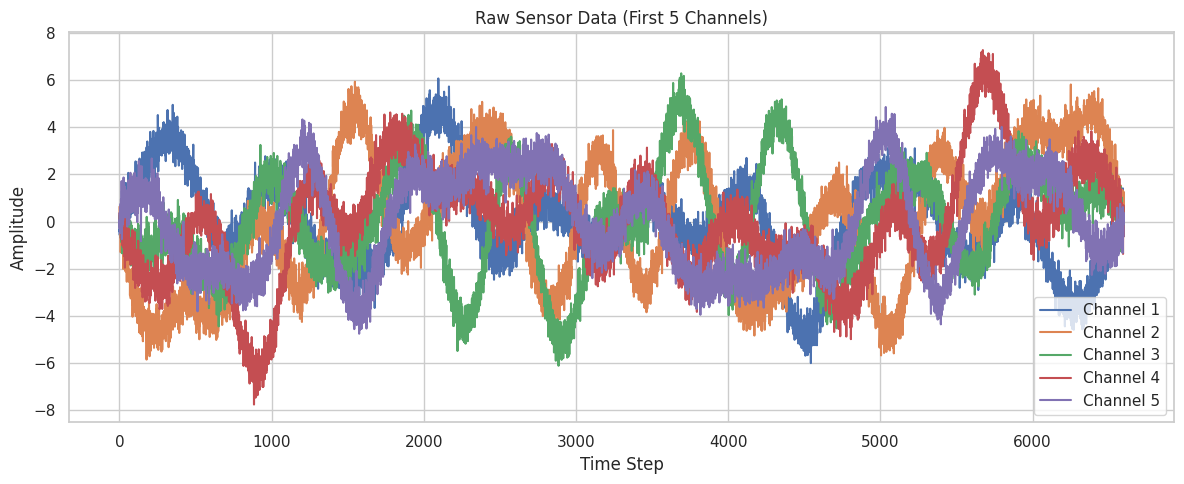

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(5):  # Plot first 5 channels
    plt.plot(data_matrix[i], label=f'Channel {i+1}')
plt.title("Raw Sensor Data (First 5 Channels)")
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


## Step 2: Apply SVD to the Data Matrix

In [ ]:
U, S, VT = np.linalg.svd(data_matrix, full_matrices=False)

print(f" The shape of the singular values S is {S.shape}, U shape is {U.shape} and VT shape is {VT.shape}")

print("U shape:", U.shape)
print("S shape:", S.shape)
print("VT shape:", VT.shape)


 The shape of the singular values S is (500,), U shape is (500, 500) and VT shape is (500, 6600)
U shape: (500, 500)
S shape: (500,)
VT shape: (500, 6600)


### Visualize the Singular Value Spectrum

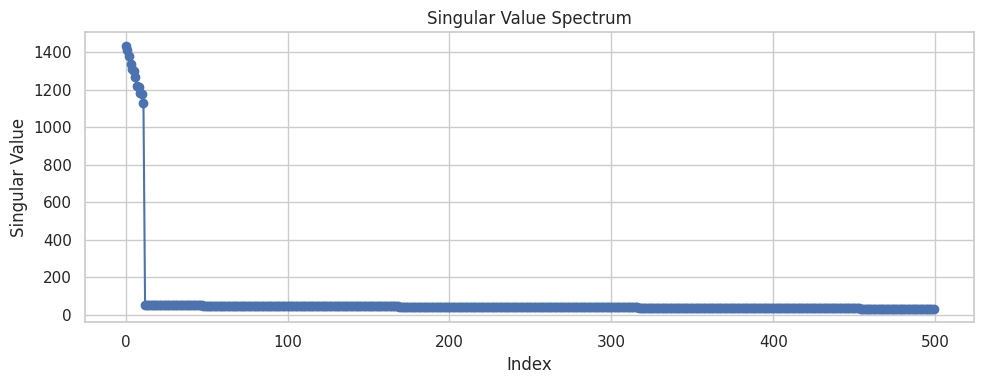

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(S, marker='o')
plt.title("Singular Value Spectrum")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.grid(True)
plt.tight_layout()
plt.show()


### Zooming in the the top index

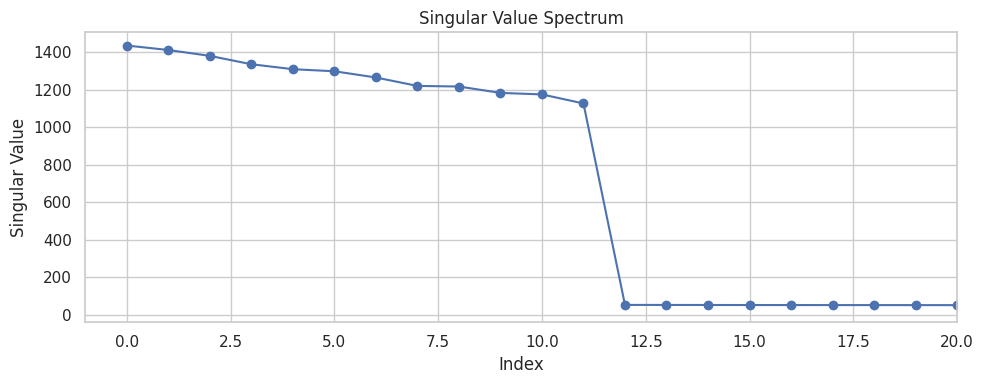

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(S, marker='o')
plt.title("Singular Value Spectrum")
plt.xlabel("Index")
plt.xlim(-1, 20)  # Limit x-axis for better visibility

plt.ylabel("Singular Value")
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 3: Truncate to Top-12 Singular Values

In [ ]:
k = 12  # Number of singular values to keep
print(f"Keeping the first {k} singular values.")
U_k = U[:, :k]
S_k = np.diag(S[:k])
VT_k = VT[:k, :]

# Reconstruct the data matrix
reconstructed = U_k @ S_k @ VT_k
print(f"Reconstructed data matrix shape: {reconstructed.shape}")

Keeping the first 12 singular values.
Reconstructed data matrix shape: (500, 6600)


### Compare Original and Reconstructed Data

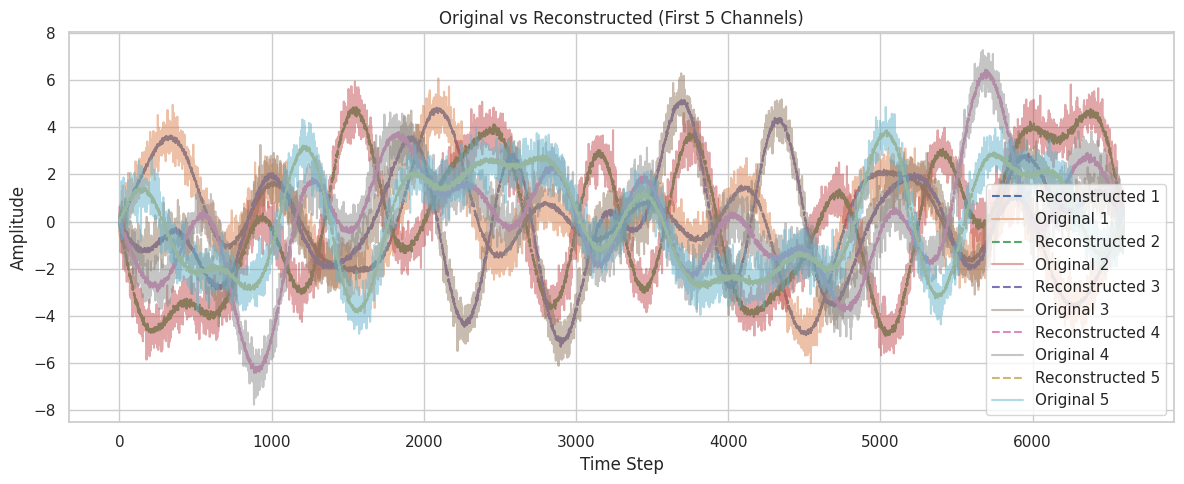

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(5):
    plt.plot(reconstructed[i], label=f'Reconstructed {i+1}', linestyle='--', alpha=1)
    plt.plot(data_matrix[i], label=f'Original {i+1}', alpha=0.5)
plt.title("Original vs Reconstructed (First 5 Channels)")
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.legend( loc='best')
plt.tight_layout()
plt.show()


## Step 4: Compression Analysis

In [ ]:
original_size = np.prod(data_matrix.shape)
compressed_size = np.prod(U_k.shape) + np.prod(S_k.shape) + np.prod(VT_k.shape)
compression_ratio = original_size / compressed_size

print(f"Original size: {original_size}")
print(f"Compressed size: {compressed_size}")
print(f"Compression ratio: {compression_ratio:.2f}x")


Original size: 3300000
Compressed size: 85344
Compression ratio: 38.67x
